In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pickle
import copy

import pandas as pd
import time

from interpolate_over import InterpolateOverDefectGaussianProcess, interpolateOverDefectsGP
from lsst.meas.algorithms import CloughTocher2DInterpolatorUtils as ctUtils

#%matplotlib widget

sub-divide bad pixel array to avoid memory error.
1.6824030876159668


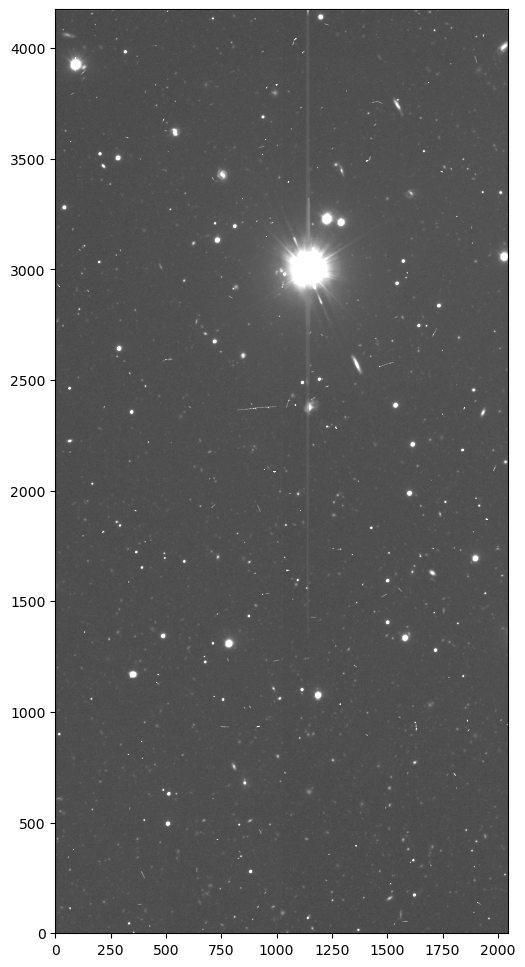

In [6]:
dic = pickle.load(open("data/out_test_0.pkl", "rb"))
maskedImage = dic['in']['maskedImage']

solvers = ['treegp']
solvers_method = ['Cholesky + Binned 2d Scipy']
methods = ['spanset']


# Create an empty dataframe to store the results
df = pd.DataFrame(columns=['Solver', 'Method', 'Time'])

to_interpolate = copy.deepcopy(maskedImage)

#GP = InterpolateOverDefectGaussianProcess(to_interpolate, defects=["SAT"],
#                                          fwhm=15, bin_spacing=15, threshold_subdivide=20000)

# Perform the interpolation and record the time for each solver and method
#start_time = time.time()
#GP.interpolate_over_defects()
#end_time = time.time()
#execution_time = end_time - start_time
# print(execution_time)

# Append the results to the dataframe
# df = pd.concat([df, pd.DataFrame({'Solver': [s], 'Method': [m], 'Time': [execution_time]})], ignore_index=True)

#plt.figure(figsize=(12, 12))
#plt.imshow(GP.maskedImage.getImage().array, vmin=400, vmax=800, cmap=plt.cm.Greys_r)
#plt.gca().invert_yaxis()

start_time = time.time()
interpolateOverDefectsGP(to_interpolate, 15, ["SAT"], method="treegp", bin_spacing=15, threshold_subdivide=20000)
end_time = time.time()
execution_time = end_time - start_time
print(execution_time)

plt.figure(figsize=(12, 12))
plt.imshow(to_interpolate.getImage().array, vmin=400, vmax=800, cmap=plt.cm.Greys_r)
plt.gca().invert_yaxis()

sub-divide bad pixel array to avoid memory error.
0.2883584499359131


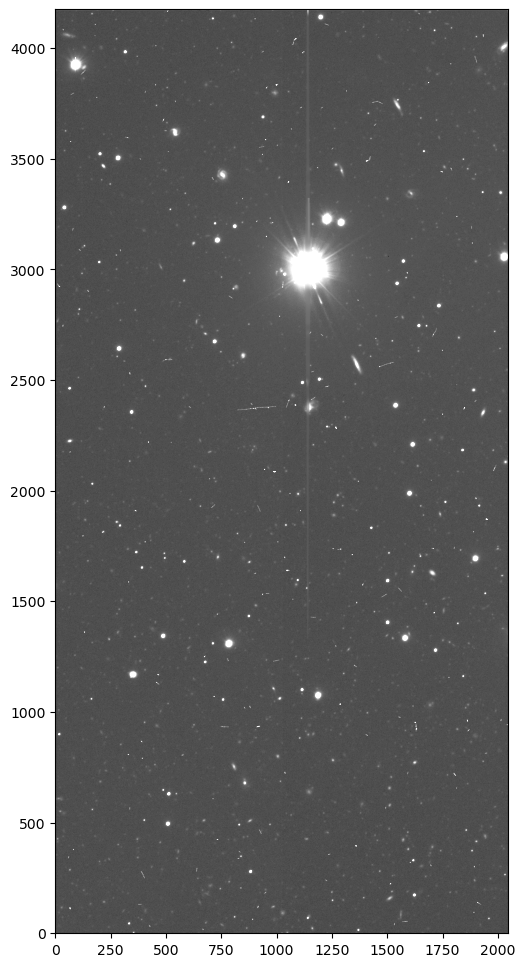

In [8]:
to_interpolate = copy.deepcopy(maskedImage)

start_time = time.time()
interpolateOverDefectsGP(to_interpolate, 15, ["SAT"], method="jax", bin_spacing=15, threshold_subdivide=20000)
end_time = time.time()
execution_time = end_time - start_time
print(execution_time)

plt.figure(figsize=(12, 12))
plt.imshow(to_interpolate.getImage().array, vmin=400, vmax=800, cmap=plt.cm.Greys_r)
plt.gca().invert_yaxis()

In [ ]:
dic = pickle.load(open("data/out_test_0.pkl", "rb"))
maskedImage = dic['in']['maskedImage']


bad_pixel, good_pixel = ctUtils.findGoodPixelsAroundBadPixels(maskedImage, ["SAT"], buffer=25)

plt.figure(figsize=(8,12))
plt.scatter(good_pixel[:,0], good_pixel[:,1],
            c=good_pixel[:,2],
            vmin=400, vmax=800, cmap=plt.cm.Greys_r, s=1)
plt.axis('equal')
xlim = plt.xlim()
ylim = plt.ylim()
plt.title('Good pixels')
plt.savefig('good_pixel.png')


plt.figure(figsize=(8,12))
plt.scatter(bad_pixel[:,0], bad_pixel[:,1],
            c=bad_pixel[:,2],
            vmin=400, vmax=800, cmap=plt.cm.Greys_r, s=1)
plt.axis('equal')
xlim = plt.xlim()
ylim = plt.ylim()
plt.title('Bad pixels')
plt.savefig('bad_pixel.png')